In [1]:
import torch
from torch.utils.data import DataLoader
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from datasets import load_metric
from tqdm import tqdm
import requests
import matplotlib.pyplot as plt

In [32]:
categories_index = api_client.wow.game_data.get_quests_index("us", "en_US")
categories_index

{'_links': {'self': {'href': 'https://us.api.blizzard.com/data/wow/quest/?namespace=static-10.2.7_54366-us'}},
 'categories': {'href': 'https://us.api.blizzard.com/data/wow/quest/category/?namespace=static-10.2.7_54366-us'},
 'areas': {'href': 'https://us.api.blizzard.com/data/wow/quest/area/?namespace=static-10.2.7_54366-us'},
 'types': {'href': 'https://us.api.blizzard.com/data/wow/quest/type/?namespace=static-10.2.7_54366-us'}}

In [49]:
categories_url = categories_index['_links']['self']['href']
categories_url

'https://us.api.blizzard.com/data/wow/quest/?namespace=static-10.2.7_54366-us'

In [41]:
def create_access_token(client_id, client_secret, region='us'):
    data = {'grant_type': 'client_credentials'}
    response = requests.post('https://%s.battle.net/oauth/token' % region, data=data, auth=(client_id, client_secret))
    return response.json()


access_token = create_access_token('8843026c4e2244c9a252c802ca0a2587', 'MD8fXWnzB95HVJJwDt1uPq3e9VU07r6v')

In [51]:
access_token['access_token']

'US7ubFvvq16V7hAQt6mKB5Xu09HuQq4gU1'

In [52]:
def fetch_quest_details(quest_id, namespace='static-us', locale='en_US'):
    quest_url = f"https://us.api.blizzard.com/data/wow/quest/{quest_id}"
    params = {
        'namespace': namespace,
        'locale': locale,
        'access_token': access_token['access_token'],
    }
    response = requests.get(quest_url, params=params)
    return response.json()

№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№

In [2]:
import requests


def create_access_token(client_id, client_secret, region='us'):
    data = {'grant_type': 'client_credentials'}
    response = requests.post(
        f'https://{region}.battle.net/oauth/token',
        data=data,
        auth=(client_id, client_secret)
    )
    return response.json()


access_token = create_access_token('8843026c4e2244c9a252c802ca0a2587', 'MD8fXWnzB95HVJJwDt1uPq3e9VU07r6v')
print(access_token)

{'access_token': 'US7ubFvvq16V7hAQt6mKB5Xu09HuQq4gU1', 'token_type': 'bearer', 'expires_in': 86399, 'sub': '8843026c4e2244c9a252c802ca0a2587'}


In [3]:
# Function to fetch JSON data with error handling
def fetch_json(url, headers):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching {url}: {response.status_code}")
        return None

In [4]:
# Extract the access token
token = access_token['access_token']

headers = {'Authorization': f'Bearer {token}'}
categories_url = 'https://us.api.blizzard.com/data/wow/quest/category/?namespace=static-10.2.7_54366-us'
categories_data = fetch_json(categories_url, headers)

In [70]:
categories_data

{'_links': {'self': {'href': 'https://us.api.blizzard.com/data/wow/quest/category/?namespace=static-10.2.7_54366-us'}},
 'categories': [{'key': {'href': 'https://us.api.blizzard.com/data/wow/quest/category/1?namespace=static-10.2.7_54366-us'},
   'name': {'en_US': 'Epic',
    'es_MX': 'Épica',
    'pt_BR': 'Épico',
    'de_DE': 'Episch',
    'en_GB': 'Epic',
    'es_ES': 'Épica',
    'fr_FR': 'Épique',
    'it_IT': 'Epica',
    'ru_RU': 'Эпические',
    'ko_KR': '대규모',
    'zh_TW': '史詩',
    'zh_CN': '史诗'},
   'id': 1},
  {'key': {'href': 'https://us.api.blizzard.com/data/wow/quest/category/21?namespace=static-10.2.7_54366-us'},
   'name': {'en_US': "Hallow's End",
    'es_MX': 'Halloween',
    'pt_BR': 'Noturnália',
    'de_DE': 'Schlotternächte',
    'en_GB': "Hallow's End",
    'es_ES': 'Halloween',
    'fr_FR': 'Sanssaint',
    'it_IT': 'Veglia delle Ombre',
    'ru_RU': 'Тыквовин',
    'ko_KR': '할로윈 축제',
    'zh_TW': '萬鬼節',
    'zh_CN': '万圣节'},
   'id': 21},
  {'key': {'href': 'ht

In [5]:
all_quest_ids = []

if categories_data and 'categories' in categories_data:
    for category in categories_data['categories']:
        # Ensure 'key' and 'href' keys exist in category
        if 'key' in category and 'href' in category['key']:
            category_url = category['key']['href']
            category_data = fetch_json(category_url, headers)
            if category_data and 'quests' in category_data:
                for quest in category_data['quests']:
                    quest_id = quest['id']
                    if quest_id not in all_quest_ids:
                        all_quest_ids.append(quest_id)

    print("All Quest IDs:", all_quest_ids)

All Quest IDs: [8446, 8447, 8311, 8312, 8353, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 11131, 11135, 11219, 11220, 11242, 11356, 11357, 11360, 11361, 11392, 11401, 11403, 11404, 11405, 11439, 11440, 11449, 11450, 12133, 12135, 12139, 12155, 12286, 12331, 12332, 12333, 12334, 12335, 12336, 12337, 12338, 12339, 12340, 12341, 12342, 12343, 12344, 12345, 12347, 12348, 12349, 12350, 12351, 12352, 12353, 12354, 12355, 12356, 12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366, 12367, 12368, 12369, 12370, 12371, 12373, 12374, 12375, 12376, 12377, 12378, 12379, 12380, 12381, 12382, 12383, 12384, 12385, 12386, 12387, 12388, 12389, 12390, 12391, 12392, 12393, 12394, 12395, 12396, 12397, 12398, 12399, 12400, 12401, 12402, 12403, 12404, 12405, 12406, 12407, 12408, 12409, 12410, 12940, 12941, 12944, 12945, 12946, 12947, 12950, 13433, 13434, 13435, 13436, 13437, 13438, 13439, 13448, 13452, 13456, 13459, 13460, 13461, 13462, 13463, 13464, 13465, 13466, 13467, 13468, 13469, 13470, 13

In [6]:
len(all_quest_ids)

8483

In [7]:
with open("quest_ids.txt", "w") as file:
    file.writelines(f"{description}\n" for description in all_quest_ids)

In [8]:
def fetch_quest_details(quest_id, access_token, namespace='static-us', locale='en_US', retries=3):
    quest_url = f"https://us.api.blizzard.com/data/wow/quest/{quest_id}"
    params = {
        'namespace': namespace,
        'locale': locale,
        'access_token': access_token
    }
    for attempt in range(retries):
        with requests.get(quest_url, params=params, timeout=10) as response:
            return response.json()

In [9]:
 def fetch_and_append_description(quest_id):
    quest_details = fetch_quest_details(quest_id, token)
    if quest_details and 'description' in quest_details:
        return quest_details['description']
    return None

In [10]:
from concurrent.futures import ThreadPoolExecutor, as_completed

all_quest_descriptions = []

# Use ThreadPoolExecutor to fetch quest details concurrently
with ThreadPoolExecutor(max_workers=12) as executor:
    # Create a list of futures
    futures = {executor.submit(fetch_and_append_description, quest_id): quest_id for quest_id in all_quest_ids}

    # Use tqdm to show progress
    for future in tqdm(as_completed(futures), total=len(futures)):
        result = future.result()
        if result:
            all_quest_descriptions.append(result)

print('All Descriptions:', all_quest_descriptions)

100%|██████████| 8483/8483 [21:53<00:00,  6.46it/s]

All Descriptions: ["A trick-or-treater!  Yeah mon!\n\nWell now, even though you're doing something noble and collecting candies for a child, I can't let you off the hook that easily.  I have a yummy Darkspear Gumdrop to give to the child... if you make a train noise for me!  Haha, yes, that'll be the trick!  The price of this gumdrop is one train noise!\n\nChugga-chugga, {class}!\r\n", "Even though you're trick-or-treating on behalf of a child, you still need to perform a trick for the treat!  We can't very well change the tradition, now can we...\n\nI believe the cost of a piece of marzipan nowadays is to bust out and DANCE!  That's right, let me see your moves!  Dance for me, and I'll give you some tasty marzipan!", "I want to keep trick-or-treating, but I can't because the Matron won't let me.  If you go for me, I'd trade you the candy you get for some I already have!  I think you'd like this candy - it makes you turn into things both funny and scary!\n\nEach of the innkeepers in th

In [2]:
with open("quest_descriptions.txt", "w") as file:
    file.writelines(f"{description}\n<wee>\n" for description in all_quest_descriptions)

NameError: name 'all_quest_descriptions' is not defined

№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№

In [18]:
with open("quest_descriptions.txt", "r") as file:
    dataset_descriptions = file.read().split('\n<wee>\n')

In [19]:
dataset_descriptions

["A trick-or-treater!  Yeah mon!\n\nWell now, even though you're doing something noble and collecting candies for a child, I can't let you off the hook that easily.  I have a yummy Darkspear Gumdrop to give to the child... if you make a train noise for me!  Haha, yes, that'll be the trick!  The price of this gumdrop is one train noise!\n\nChugga-chugga, {class}!\n\n",
 "Even though you're trick-or-treating on behalf of a child, you still need to perform a trick for the treat!  We can't very well change the tradition, now can we...\n\nI believe the cost of a piece of marzipan nowadays is to bust out and DANCE!  That's right, let me see your moves!  Dance for me, and I'll give you some tasty marzipan!",
 "I want to keep trick-or-treating, but I can't because the Matron won't let me.  If you go for me, I'd trade you the candy you get for some I already have!  I think you'd like this candy - it makes you turn into things both funny and scary!\n\nEach of the innkeepers in the big cities hav

In [20]:
rouge_metric = load_metric('rouge')
bleu_metric = load_metric('bleu')

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')  #gpt2-medium
tokenizer.pad_token = tokenizer.eos_token

/home/vasyl/PycharmProjects/SanyaBot/.venv/lib/python3.9/site-packages/datasets/load.py:759: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/vasyl/PycharmProjects/SanyaBot/.venv/lib/python3.9/site-packages/datasets/load.py:759: FutureWarning: The repository for bleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/bleu/bleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=Tru

In [21]:
def tokenize(examples):
    input_data = tokenizer(examples['train'], padding='max_length', truncation=True, max_length=256)
    outputs = {
        "input_ids": input_data['input_ids'],
        "attention_mask": input_data['attention_mask'],
        "text": examples['train']
    }
    return outputs


def tokenize_valid(examples):
    tokenizer.padding_side='left'
    input_data = tokenizer(examples['train'], padding='max_length', truncation=True,
                           max_length=256)
    outputs = {
        "input_ids": input_data['input_ids'],
        "attention_mask": input_data['attention_mask'],
        "text": examples['train']
    }
    return outputs

In [22]:
import pandas as pd

df = pd.DataFrame(dataset_descriptions)

from datasets import Dataset

dataset = Dataset.from_pandas(df.rename(columns={0: "train"})).train_test_split(test_size=0.05,seed=42)

tokenized_train_datasets = (
    dataset["train"]
    .map(tokenize, batched=True)
)


tokenized_valid_datasets = (
    dataset["test"]
    .map(tokenize_valid, batched=True)
)

Map:   0%|          | 0/6997 [00:00<?, ? examples/s]

Map:   0%|          | 0/369 [00:00<?, ? examples/s]

In [23]:
tokenized_train_datasets.set_format("torch")
tokenized_valid_datasets.set_format("torch")
train_dataset = tokenized_train_datasets.shuffle(seed=42)
valid_dataset = tokenized_valid_datasets

In [24]:
train_dataloader = DataLoader(
    train_dataset,
    shuffle=False,
    batch_size=8,
)
valid_dataloader = DataLoader(
    valid_dataset,
    shuffle=True,
    batch_size=32,
)

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
def calculate_bleu_score(generated_texts, reference_texts):
    return bleu_metric.compute(predictions=generated_texts, references=reference_texts)

In [27]:
def calculate_rouge_scores(generated_texts, reference_texts):
    rouge_hypotheses = generated_texts
    rouge_references = [{"summary": ref} for ref in reference_texts]
    rouge_results = rouge_metric.compute(predictions=rouge_hypotheses, references=rouge_references)
    return rouge_results

In [28]:
def generate_text(input_ids, attention_mask, num_return_sequences=1, max_length=513, temperature=1.0, top_k=50):
    output = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=max_length,
                            num_return_sequences=num_return_sequences,
                            temperature=temperature, top_k=top_k, repetition_penalty=5.0,
                            pad_token_id=tokenizer.eos_token_id)
    generated_texts = []
    for generated in output:
        text = tokenizer.decode(generated, skip_special_tokens=True)
        generated_texts.append(text)
    return generated_texts

In [29]:
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.to(device)
model.train()

epoch_bleu_scores = []
epoch_rouge1_scores = []
epoch_rouge2_scores = []
epoch_rougeL_scores = []

num_epochs = 50
optimizer = AdamW(model.parameters(), lr=3e-5)
optimizer.zero_grad()

for epoch in range(num_epochs):
    total_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}', leave=False)

    for step, batch in enumerate(progress_bar):

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        output_ids = batch["input_ids"].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=output_ids)
        loss = outputs.loss
        total_loss += loss.item()

        # Perform gradient accumulation
        # loss = loss / accumulation_steps  # Scale loss for gradient accumulation
        loss.backward()

        # if (step + 1) % accumulation_steps == 0 or step == len(train_dataloader) - 1:
        #     # Update model parameters after accumulation_steps or at the end of epoch
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()

        # Update progress bar
        progress_bar.set_postfix({'Loss': total_loss / (step + 1)})

    # Calculate average loss for the epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1} Average Loss: {avg_loss:.4f}")

    # Validation loop
    model.eval()
    valid_progress_bar = tqdm(valid_dataloader, desc=f'Epoch {epoch + 1}', leave=False)

    with torch.no_grad():
        total_bleu_score = 0
        total_rouge_scores = {"rouge1": 0.0, "rouge2": 0.0, "rougeL": 0.0}

        for step, batch in enumerate(valid_progress_bar):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            # generated_texts = generate_text(input_ids, attention_mask=attention_mask, num_return_sequences=1,
            #                                 max_length=512)
            output = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=128,
                                        num_return_sequences=1, top_k=50, repetition_penalty=3.0,
                                        pad_token_id=tokenizer.eos_token_id)

            res_preds, res_targets = [], []
            for i in range(len(input_ids)):
                rp, td = [], []
                for p in output[i]:
                    p_dec = tokenizer.decode(p.item())
                    if not p_dec in list(tokenizer.special_tokens_map.values()):
                        rp.append(p_dec)
                for t in input_ids[i]:
                    t_dec = tokenizer.decode(t.item())
                    if not t_dec in list(tokenizer.special_tokens_map.values()):
                        td.append(t_dec)
                res_preds.append(rp)
                res_targets.append([td])

            bleu_score = calculate_bleu_score(res_preds, res_targets)
            total_bleu_score += bleu_score['bleu']

            # ROUGE evaluation
            rouge_scores = calculate_rouge_scores(res_preds, res_targets)
            for key, value in rouge_scores.items():
                if key in total_rouge_scores:
                    total_rouge_scores[key] += value.mid.fmeasure
            valid_progress_bar.set_postfix({
                'Val_bleu_score': total_bleu_score / (step + 1),
                'Val_rouge1': total_rouge_scores['rouge1'] / (step + 1),
                'Val_rouge2': total_rouge_scores['rouge2'] / (step + 1),
                'Val_rougeL': total_rouge_scores['rougeL'] / (step + 1)
            })

        avg_bleu_score = total_bleu_score / len(valid_dataloader)
        avg_rouge_scores = {key: value / len(valid_dataloader) for key, value in total_rouge_scores.items()}

        print("Validation Results - Epoch {}: BLEU: {:.4f}, ROUGE: {}".format(epoch, avg_bleu_score, avg_rouge_scores))
        
        epoch_bleu_scores.append(avg_bleu_score)
        epoch_rouge1_scores.append(avg_rouge_scores['rouge1'])
        epoch_rouge2_scores.append(avg_rouge_scores['rouge2'])
        epoch_rougeL_scores.append(avg_rouge_scores['rougeL'])

    model.train()

/home/vasyl/PycharmProjects/SanyaBot/.venv/lib/python3.9/site-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1 Average Loss: 1.0612


Validation Results - Epoch 0: BLEU: 0.3783, ROUGE: {'rouge1': 0.5431746893254877, 'rouge2': 0.5386059626008098, 'rougeL': 0.542609238233079}


Epoch 2 Average Loss: 0.9128


Validation Results - Epoch 1: BLEU: 0.4055, ROUGE: {'rouge1': 0.5829682492049034, 'rouge2': 0.5788496793360126, 'rougeL': 0.5824497585410136}


Epoch 3 Average Loss: 0.8444


Validation Results - Epoch 2: BLEU: 0.4821, ROUGE: {'rouge1': 0.6625596216917163, 'rouge2': 0.6592405075089597, 'rougeL': 0.6629351709867853}


Epoch 4 Average Loss: 0.7898


Validation Results - Epoch 3: BLEU: 0.5301, ROUGE: {'rouge1': 0.70635946889301, 'rouge2': 0.704082097045775, 'rougeL': 0.7071388555963041}


Epoch 5 Average Loss: 0.7446


Validation Results - Epoch 4: BLEU: 0.5348, ROUGE: {'rouge1': 0.7134544463249858, 'rouge2': 0.7101664539072939, 'rougeL': 0.7142221912634522}


Epoch 6 Average Loss: 0.7049


Validation Results - Epoch 5: BLEU: 0.5730, ROUGE: {'rouge1': 0.7462723508820419, 'rouge2': 0.743560142806381, 'rougeL': 0.74677503844958}


Epoch 7 Average Loss: 0.6693


Validation Results - Epoch 6: BLEU: 0.5736, ROUGE: {'rouge1': 0.744733390241168, 'rouge2': 0.7417903987407669, 'rougeL': 0.7450395496791661}


Epoch 8 Average Loss: 0.6368


Validation Results - Epoch 7: BLEU: 0.5776, ROUGE: {'rouge1': 0.7493758431182419, 'rouge2': 0.7468735066592669, 'rougeL': 0.7493583338528581}


Epoch 9 Average Loss: 0.6063


Validation Results - Epoch 8: BLEU: 0.6564, ROUGE: {'rouge1': 0.7954793346075987, 'rouge2': 0.7922406729731777, 'rougeL': 0.7949713809765327}


Epoch 10 Average Loss: 0.5785


Validation Results - Epoch 9: BLEU: 0.6518, ROUGE: {'rouge1': 0.7963672947391557, 'rouge2': 0.7932974405553556, 'rougeL': 0.7962044636732392}


Epoch 11 Average Loss: 0.5513


Validation Results - Epoch 10: BLEU: 0.6800, ROUGE: {'rouge1': 0.8106155484215654, 'rouge2': 0.8074112955880545, 'rougeL': 0.810988748693978}


Epoch 12 Average Loss: 0.5256


Validation Results - Epoch 11: BLEU: 0.6593, ROUGE: {'rouge1': 0.7937413970472927, 'rouge2': 0.7905999455706434, 'rougeL': 0.7946001826337371}


Epoch 13 Average Loss: 0.5014


Validation Results - Epoch 12: BLEU: 0.6629, ROUGE: {'rouge1': 0.7984267878633701, 'rouge2': 0.7960820733019612, 'rougeL': 0.7987204138666449}


Epoch 14 Average Loss: 0.4780


Validation Results - Epoch 13: BLEU: 0.6439, ROUGE: {'rouge1': 0.7827167043427817, 'rouge2': 0.780072860196826, 'rougeL': 0.7832658418283956}


Epoch 15 Average Loss: 0.4560


Validation Results - Epoch 14: BLEU: 0.6324, ROUGE: {'rouge1': 0.7796420092445436, 'rouge2': 0.7768921447135892, 'rougeL': 0.7791900556385946}


Epoch 16 Average Loss: 0.4340


Validation Results - Epoch 15: BLEU: 0.6589, ROUGE: {'rouge1': 0.7915272793608069, 'rouge2': 0.788365182859657, 'rougeL': 0.7918681879791004}


Epoch 17 Average Loss: 0.4135


Validation Results - Epoch 16: BLEU: 0.6738, ROUGE: {'rouge1': 0.803657255669067, 'rouge2': 0.8007587482618566, 'rougeL': 0.8040776692168409}


Epoch 18 Average Loss: 0.3935


Validation Results - Epoch 17: BLEU: 0.6666, ROUGE: {'rouge1': 0.8010623357215477, 'rouge2': 0.7979116274028953, 'rougeL': 0.800850865722014}


Epoch 19 Average Loss: 0.3746


Validation Results - Epoch 18: BLEU: 0.6540, ROUGE: {'rouge1': 0.790585839164626, 'rouge2': 0.7881222523314179, 'rougeL': 0.7905578186970675}


Epoch 20 Average Loss: 0.3564


Validation Results - Epoch 19: BLEU: 0.6377, ROUGE: {'rouge1': 0.7802501262787734, 'rouge2': 0.7776948775285288, 'rougeL': 0.77925786656273}


Epoch 21 Average Loss: 0.3392


Validation Results - Epoch 20: BLEU: 0.6410, ROUGE: {'rouge1': 0.7781312019275061, 'rouge2': 0.7755793501981708, 'rougeL': 0.7778978341939496}


Epoch 22 Average Loss: 0.3218


Validation Results - Epoch 21: BLEU: 0.6749, ROUGE: {'rouge1': 0.802123714240866, 'rouge2': 0.8002678741791652, 'rougeL': 0.8035248605556888}


Epoch 23 Average Loss: 0.3052


Validation Results - Epoch 22: BLEU: 0.6594, ROUGE: {'rouge1': 0.7935690282375284, 'rouge2': 0.7901167037644227, 'rougeL': 0.7930638680154626}


Epoch 24 Average Loss: 0.2899


Validation Results - Epoch 23: BLEU: 0.6399, ROUGE: {'rouge1': 0.7811236516487349, 'rouge2': 0.7780192312815202, 'rougeL': 0.7805961215193876}


Epoch 25 Average Loss: 0.2754


Validation Results - Epoch 24: BLEU: 0.6867, ROUGE: {'rouge1': 0.8107703999467657, 'rouge2': 0.8079756014481553, 'rougeL': 0.8107286977745606}


Epoch 26 Average Loss: 0.2609


Validation Results - Epoch 25: BLEU: 0.6456, ROUGE: {'rouge1': 0.7834591958032294, 'rouge2': 0.7804081711292766, 'rougeL': 0.7832489183505181}


Epoch 27 Average Loss: 0.2475


Validation Results - Epoch 26: BLEU: 0.6570, ROUGE: {'rouge1': 0.7883285172702218, 'rouge2': 0.7857106773532131, 'rougeL': 0.7886578374751684}


Epoch 28 Average Loss: 0.2349


Validation Results - Epoch 27: BLEU: 0.6469, ROUGE: {'rouge1': 0.784890405226567, 'rouge2': 0.782387315218842, 'rougeL': 0.785266950806112}


Epoch 29 Average Loss: 0.2224


Validation Results - Epoch 28: BLEU: 0.6795, ROUGE: {'rouge1': 0.8045412728528308, 'rouge2': 0.8013629683613234, 'rougeL': 0.8028923947790374}


Epoch 30 Average Loss: 0.2110


Validation Results - Epoch 29: BLEU: 0.6639, ROUGE: {'rouge1': 0.7957361420547625, 'rouge2': 0.7930462337081038, 'rougeL': 0.7961852641861639}


Epoch 31 Average Loss: 0.1995


Validation Results - Epoch 30: BLEU: 0.6770, ROUGE: {'rouge1': 0.8022305397235376, 'rouge2': 0.7990066500343008, 'rougeL': 0.8007733908523388}


Epoch 32 Average Loss: 0.1889


Validation Results - Epoch 31: BLEU: 0.6845, ROUGE: {'rouge1': 0.8097678817376717, 'rouge2': 0.8063719762675068, 'rougeL': 0.809317601693513}


Epoch 33 Average Loss: 0.1791


Validation Results - Epoch 32: BLEU: 0.6642, ROUGE: {'rouge1': 0.7924188901794719, 'rouge2': 0.7889821396949687, 'rougeL': 0.7927111123402847}


Epoch 34 Average Loss: 0.1698


Validation Results - Epoch 33: BLEU: 0.6719, ROUGE: {'rouge1': 0.8002015327086202, 'rouge2': 0.797892797581115, 'rougeL': 0.8009260016736054}


Epoch 35 Average Loss: 0.1612


Validation Results - Epoch 34: BLEU: 0.6583, ROUGE: {'rouge1': 0.7905873228498389, 'rouge2': 0.7882127147318854, 'rougeL': 0.7913319485903227}


Epoch 36 Average Loss: 0.1522


Validation Results - Epoch 35: BLEU: 0.6672, ROUGE: {'rouge1': 0.7950252041271297, 'rouge2': 0.7920132770262979, 'rougeL': 0.7946009026356542}


Epoch 37 Average Loss: 0.1444


Validation Results - Epoch 36: BLEU: 0.6835, ROUGE: {'rouge1': 0.8084780230599667, 'rouge2': 0.8067377105469298, 'rougeL': 0.8086512741694397}


Epoch 38 Average Loss: 0.1371


Validation Results - Epoch 37: BLEU: 0.7060, ROUGE: {'rouge1': 0.8202645271289007, 'rouge2': 0.8177750242443782, 'rougeL': 0.8204582995692326}


Epoch 39 Average Loss: 0.1298


Validation Results - Epoch 38: BLEU: 0.6643, ROUGE: {'rouge1': 0.7915947056365531, 'rouge2': 0.7893044607569378, 'rougeL': 0.7918696594711175}


Epoch 40 Average Loss: 0.1233


Validation Results - Epoch 39: BLEU: 0.6834, ROUGE: {'rouge1': 0.8063948624379572, 'rouge2': 0.8023209070228706, 'rougeL': 0.8063759662495759}


Epoch 41 Average Loss: 0.1173


Validation Results - Epoch 40: BLEU: 0.6740, ROUGE: {'rouge1': 0.7962338609425981, 'rouge2': 0.7939670380721946, 'rougeL': 0.7961640877863481}


Epoch 42 Average Loss: 0.1117


Validation Results - Epoch 41: BLEU: 0.7027, ROUGE: {'rouge1': 0.8190016796900923, 'rouge2': 0.8158727636994181, 'rougeL': 0.8185286974249241}


Epoch 43 Average Loss: 0.1058


Validation Results - Epoch 42: BLEU: 0.6607, ROUGE: {'rouge1': 0.7903982315918353, 'rouge2': 0.7876393620517059, 'rougeL': 0.7906824173249171}


Epoch 44 Average Loss: 0.1012


Validation Results - Epoch 43: BLEU: 0.7129, ROUGE: {'rouge1': 0.8238367082618024, 'rouge2': 0.8218675552893991, 'rougeL': 0.8230979524693981}


Epoch 45 Average Loss: 0.0970


Validation Results - Epoch 44: BLEU: 0.6926, ROUGE: {'rouge1': 0.8101928787076734, 'rouge2': 0.8076093350688334, 'rougeL': 0.8096168570656714}


Epoch 46 Average Loss: 0.0921


Validation Results - Epoch 45: BLEU: 0.6659, ROUGE: {'rouge1': 0.7995928733051262, 'rouge2': 0.7970947373568874, 'rougeL': 0.7986052453446767}


Epoch 47 Average Loss: 0.0885


Validation Results - Epoch 46: BLEU: 0.6808, ROUGE: {'rouge1': 0.802923913003415, 'rouge2': 0.8002437313756343, 'rougeL': 0.8032515592844748}


Epoch 48 Average Loss: 0.0847


Validation Results - Epoch 47: BLEU: 0.6537, ROUGE: {'rouge1': 0.7854296093301115, 'rouge2': 0.7816330501168233, 'rougeL': 0.7847825996389307}


Epoch 49 Average Loss: 0.0811


Validation Results - Epoch 48: BLEU: 0.6836, ROUGE: {'rouge1': 0.8039613261667155, 'rouge2': 0.8012331521147619, 'rougeL': 0.8034386903225199}


Epoch 50 Average Loss: 0.0782


Validation Results - Epoch 49: BLEU: 0.6930, ROUGE: {'rouge1': 0.8127625425757428, 'rouge2': 0.809975694166236, 'rougeL': 0.8127781168092018}


KeyboardInterrupt: 

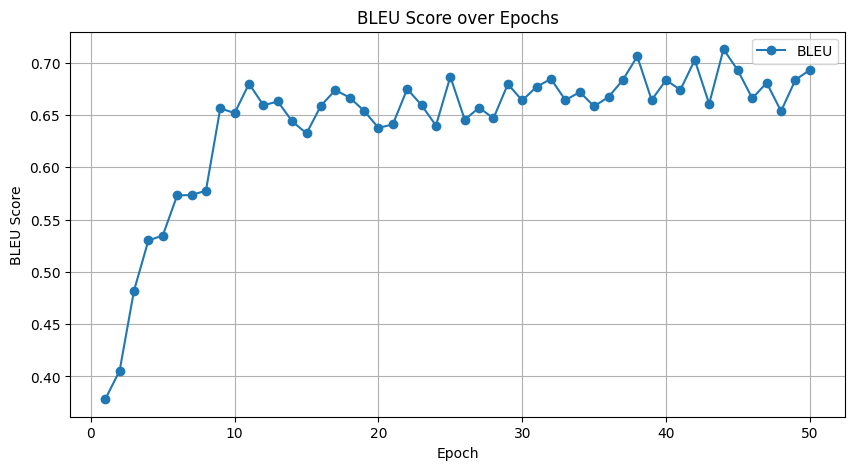

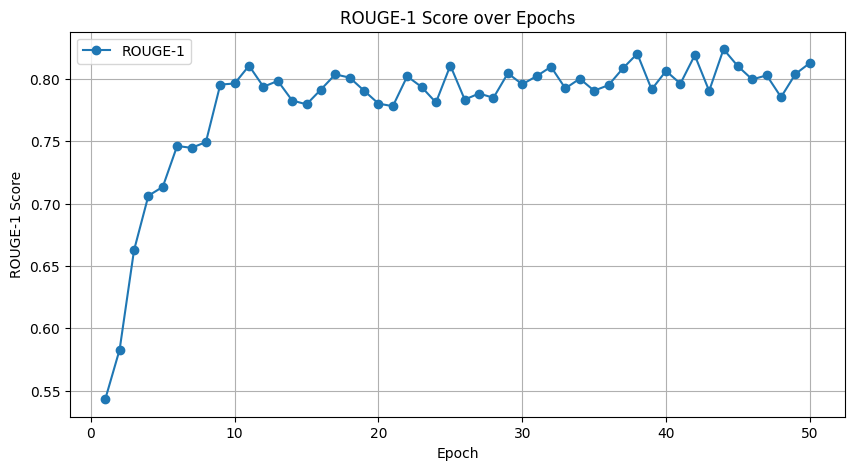

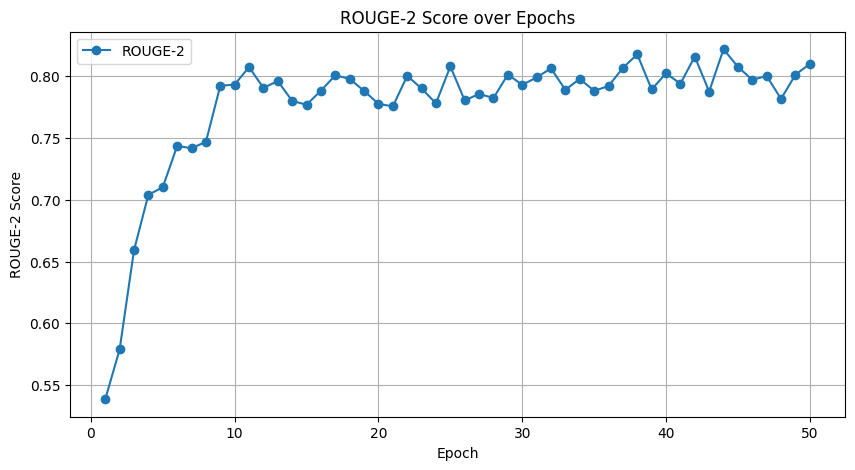

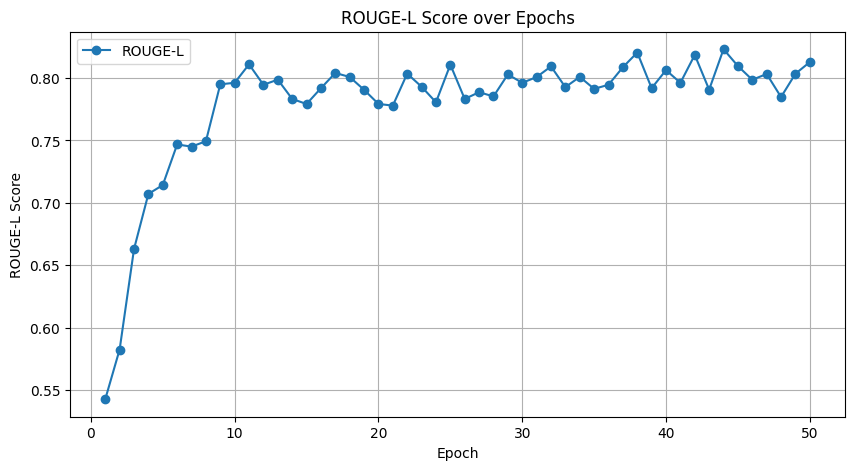

In [32]:
# Plot BLEU scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_bleu_scores, marker='o', label='BLEU')
plt.title('BLEU Score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
plt.legend()
plt.grid()
plt.show()

# Plot ROUGE-1 scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_rouge1_scores, marker='o', label='ROUGE-1')
plt.title('ROUGE-1 Score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('ROUGE-1 Score')
plt.legend()
plt.grid()
plt.show()

# Plot ROUGE-2 scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_rouge2_scores, marker='o', label='ROUGE-2')
plt.title('ROUGE-2 Score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('ROUGE-2 Score')
plt.legend()
plt.grid()
plt.show()

# Plot ROUGE-L scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_rougeL_scores, marker='o', label='ROUGE-L')
plt.title('ROUGE-L Score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('ROUGE-L Score')
plt.legend()
plt.grid()
plt.show()

In [33]:
output_path = 'GPT2-persona-model-new2.pth'
torch.save(model.state_dict(), output_path)

In [34]:
model_path = 'GPT2-persona-model-new2.pth'
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.load_state_dict(torch.load(model_path))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token_id = tokenizer.eos_token_id


In [35]:
# Example prompt
prompt = (tokenizer.bos_token + "Hey adventurer, i got work for you")
# prompt = (tokenizer.bos_token + "Hi. What brought you here?" + "\n-----\n")

# Generate multiple responses
num_return_sequences = 3
generated_responses = []
# Generate one response at a time
input_data = tokenizer(prompt, truncation=True, padding=True, max_length=256)

input_ids = torch.tensor([input_data['input_ids']])
attention_mask = torch.tensor([input_data['attention_mask']])
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)

generated_response = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=256,
                                    num_return_sequences=num_return_sequences, top_k=50, repetition_penalty=3.0,num_beams=20, do_sample=True,
                                    pad_token_id=tokenizer.eos_token_id, temperature=0.3,top_p=0.95)
for i in range(num_return_sequences):
    generated_text = tokenizer.decode(generated_response[i], skip_special_tokens=True)
    generated_responses.append(generated_text)
# prompt = generated_text.replace('__ SILENCE __', "")

# Print the generated responses
for i, response in enumerate(generated_responses):
    print(f"Generated Response {i + 1}: {response}")

Generated Response 1: Hey adventurer, i got work for you.



The Dragonscale Expedition has requested a special weapon for their warriors. 



And if you take a look, they have some weapons too. Too many? 



<Sika does her best attempt at looking like a grown-up pterrordax.>



I can already hear the whirring bronze gizmos singing their song of mechanical rapture as you pass.



<Sika smirks.>



I could use a good {class} on my side. I've heard rumors of travelers offering winter hyacinths to a lonely maiden in return for gifts.
Generated Response 2: Hey adventurer, i got work for you.



The Dragonscale Expedition has requested a special weapon for their warriors. 



And if you take a look, they have some weapons too. Too many? 



<Sika does her best attempt at looking like a grown-up pterrordax.>



I can already hear the whirring bronze gizmos singing their song of mechanical rapture as you pass.



<Sika smirks.>



I could use a good {class} on my side. I've heard tales about 